Nama:

In [1]:
print('Nama : Hanun Masitha Ramadhani')

Nama : Hanun Masitha Ramadhani


(1) Import dataset credit card application. Jadikan kolom 'status' menjadi kolom target, dengan accepted = 1, not accepted = 0.

In [2]:
import pandas as pd
df_application = pd.read_csv('cc_application.csv')
df_application

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1


(2) Periksa adanya missing value pada dataset, dan lakukan dropna apabila sedikit jumlahnya.

In [3]:
missing = []
persen = []

for i in df_application.columns:
    missing.append(df_application[i].isnull().sum())
    persen.append(df_application[i].isnull().sum()/len(df_application[i])*100)

proporsi_hilang = pd.DataFrame({
        'kolom' : df_application.columns,
        'missing' : missing,
        'persen_missing' : persen
})
    
proporsi_hilang

,kolom,missing,persen_missing
0,Applicant_ID,0,0.0
1,Applicant_Gender,0,0.0
2,Owned_Car,0,0.0
3,Owned_Realty,0,0.0
4,Total_Children,0,0.0
5,Total_Income,0,0.0
6,Income_Type,0,0.0
7,Education_Type,0,0.0
8,Family_Status,0,0.0
9,Housing_Type,0,0.0


In [4]:
y = df_application['Status']
x = df_application.drop(['Status'], axis = 1)

(3) Lakukan train test split, test:test = 4:1, stratify = y.

In [5]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 20102
Jumlah Data Test : 5026


(4) Lakukan transformasi pada X_train apabila diperlukan (imputation/scaling/onehotencoding/selection). Lakukan transformasi serupa pada X_test tanpa melakukan fitting kembali.

Data Training

In [6]:
X_train_obj = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')
X_train_obj

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
13610,F,Working ...,Higher education ...,Married ...,House / apartment ...,Managers ...
13835,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Security staff ...
18023,F,Working ...,Secondary / secondary special ...,Married ...,Municipal apartment ...,Laborers ...
9967,M,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Managers ...
9254,F,Working ...,Higher education ...,Married ...,House / apartment ...,Cooking staff ...
...,...,...,...,...,...,...
16955,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Laborers ...
14769,F,Working ...,Secondary / secondary special ...,Married ...,With parents ...,Sales staff ...
19980,F,Working ...,Higher education ...,Married ...,House / apartment ...,Core staff ...
5205,M,Working ...,Higher education ...,Married ...,House / apartment ...,High skill tech staff ...


In [7]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
oe.fit(X_train_obj)
X_train_obj_transform = oe.transform(X_train_obj)

X_train_obj_transform = pd.DataFrame(X_train_obj_transform)
X_train_obj_transform.columns = X_train_obj.columns
X_train_obj_transform

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,0.0,4.0,1.0,1.0,1.0,10.0
1,0.0,4.0,4.0,1.0,1.0,16.0
2,0.0,4.0,4.0,1.0,2.0,8.0
3,1.0,0.0,4.0,1.0,1.0,10.0
4,0.0,4.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...
20097,0.0,0.0,4.0,1.0,1.0,8.0
20098,0.0,4.0,4.0,1.0,5.0,14.0
20099,0.0,4.0,1.0,1.0,1.0,3.0
20100,1.0,4.0,1.0,1.0,1.0,6.0


In [8]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
num_minmax_scaled = minmax_scaler.fit_transform(X_train_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_train_num.columns
num_minmax_scaled

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,0.568834,1.0,0.0,0.0,0.345930,0.0,1.0,0.0,0.0,0.166667,0.425532,0.162791,0.0,0.183333
1,0.571375,0.0,0.0,0.0,0.020349,0.0,0.0,1.0,0.0,0.166667,0.361702,0.023256,0.0,0.050000
2,0.738130,0.0,0.0,0.0,0.040698,0.0,0.0,1.0,0.0,0.166667,0.680851,0.162791,0.0,0.583333
3,0.376056,0.0,1.0,0.0,0.375000,0.0,0.0,0.0,1.0,0.166667,0.702128,0.069767,0.0,0.933333
4,0.333086,0.0,1.0,0.0,0.098837,0.0,0.0,1.0,0.0,0.166667,0.489362,0.093023,0.0,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,0.680437,0.0,0.0,0.0,0.084302,0.0,0.0,0.0,0.0,0.166667,0.489362,0.069767,0.0,0.050000
20098,0.584235,0.0,0.0,0.4,0.127907,0.0,0.0,0.0,0.0,0.500000,0.276596,0.139535,0.0,0.083333
20099,0.767901,0.0,0.0,0.0,0.084302,0.0,0.0,0.0,0.0,0.166667,0.382979,0.139535,0.0,0.283333
20100,0.195679,1.0,0.0,0.6,0.127907,0.0,1.0,0.0,1.0,0.666667,0.382979,0.000000,0.0,0.916667


In [9]:
X_train_enc = pd.concat([X_train_obj_transform,num_minmax_scaled], axis=1)
X_train_enc

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,0.0,4.0,1.0,1.0,1.0,10.0,0.568834,1.0,0.0,0.0,0.345930,0.0,1.0,0.0,0.0,0.166667,0.425532,0.162791,0.0,0.183333
1,0.0,4.0,4.0,1.0,1.0,16.0,0.571375,0.0,0.0,0.0,0.020349,0.0,0.0,1.0,0.0,0.166667,0.361702,0.023256,0.0,0.050000
2,0.0,4.0,4.0,1.0,2.0,8.0,0.738130,0.0,0.0,0.0,0.040698,0.0,0.0,1.0,0.0,0.166667,0.680851,0.162791,0.0,0.583333
3,1.0,0.0,4.0,1.0,1.0,10.0,0.376056,0.0,1.0,0.0,0.375000,0.0,0.0,0.0,1.0,0.166667,0.702128,0.069767,0.0,0.933333
4,0.0,4.0,1.0,1.0,1.0,2.0,0.333086,0.0,1.0,0.0,0.098837,0.0,0.0,1.0,0.0,0.166667,0.489362,0.093023,0.0,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,0.0,0.0,4.0,1.0,1.0,8.0,0.680437,0.0,0.0,0.0,0.084302,0.0,0.0,0.0,0.0,0.166667,0.489362,0.069767,0.0,0.050000
20098,0.0,4.0,4.0,1.0,5.0,14.0,0.584235,0.0,0.0,0.4,0.127907,0.0,0.0,0.0,0.0,0.500000,0.276596,0.139535,0.0,0.083333
20099,0.0,4.0,1.0,1.0,1.0,3.0,0.767901,0.0,0.0,0.0,0.084302,0.0,0.0,0.0,0.0,0.166667,0.382979,0.139535,0.0,0.283333
20100,1.0,4.0,1.0,1.0,1.0,6.0,0.195679,1.0,0.0,0.6,0.127907,0.0,1.0,0.0,1.0,0.666667,0.382979,0.000000,0.0,0.916667


In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(score_func = mutual_info_classif, k=10)
kbest.fit(X_train_enc, y_train)
X_train_final = kbest.transform(X_train_enc)

X_train_final = pd.DataFrame(X_train_final)
X_train_final.columns = X_train_enc.columns[kbest.get_support()]
X_train_final

,Income_Type,Education_Type,Family_Status,Housing_Type,Applicant_ID,Owned_Realty,Total_Income,Applicant_Age,Total_Bad_Debt,Total_Good_Debt
0,4.0,1.0,1.0,1.0,0.568834,0.0,0.345930,0.425532,0.0,0.183333
1,4.0,4.0,1.0,1.0,0.571375,0.0,0.020349,0.361702,0.0,0.050000
2,4.0,4.0,1.0,2.0,0.738130,0.0,0.040698,0.680851,0.0,0.583333
3,0.0,4.0,1.0,1.0,0.376056,1.0,0.375000,0.702128,0.0,0.933333
4,4.0,1.0,1.0,1.0,0.333086,1.0,0.098837,0.489362,0.0,0.450000
...,...,...,...,...,...,...,...,...,...,...
20097,0.0,4.0,1.0,1.0,0.680437,0.0,0.084302,0.489362,0.0,0.050000
20098,4.0,4.0,1.0,5.0,0.584235,0.0,0.127907,0.276596,0.0,0.083333
20099,4.0,1.0,1.0,1.0,0.767901,0.0,0.084302,0.382979,0.0,0.283333
20100,4.0,1.0,1.0,1.0,0.195679,0.0,0.127907,0.382979,0.0,0.916667


c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    20010
0       92
Name: Status, dtype: int64


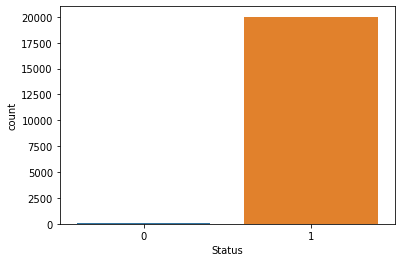

In [11]:
import seaborn as sns

sns.countplot(y_train)
print(y_train.value_counts())

In [12]:
# SMOTE
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=500)

X_train_sm, y_train_sm = sm.fit_resample(X_train_final, y_train)

print(f'''Shape of X before SMOTE: {X_train_final.shape}
Shape of X after SMOTE: {X_train_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))


Shape of X before SMOTE: (20102, 10)
Shape of X after SMOTE: (40020, 10)

Balance of positive and negative classes (%):
After OverSampling, counts of label '1': 20010
After OverSampling, counts of label '0': 20010


Data testing

In [13]:
X_test_obj = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')
X_test_obj

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
9246,M,State servant ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,Laborers ...
16789,M,Working ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Laborers ...
11806,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Drivers ...
12338,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,High skill tech staff ...
13353,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Managers ...
...,...,...,...,...,...,...
11454,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Sales staff ...
9850,F,Working ...,Incomplete higher ...,Single / not married ...,Rented apartment ...,Laborers ...
8346,F,Working ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,High skill tech staff ...
5487,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Drivers ...


In [14]:
X_test_obj_transform = oe.transform(X_test_obj)

X_test_obj_transform = pd.DataFrame(X_test_obj_transform)
X_test_obj_transform.columns = X_test_obj.columns
X_test_obj_transform

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,1.0,2.0,4.0,0.0,1.0,8.0
1,1.0,4.0,4.0,3.0,1.0,8.0
2,1.0,4.0,4.0,1.0,1.0,4.0
3,0.0,0.0,4.0,3.0,1.0,6.0
4,0.0,0.0,4.0,1.0,1.0,10.0
...,...,...,...,...,...,...
5021,0.0,0.0,4.0,1.0,1.0,14.0
5022,0.0,4.0,2.0,3.0,4.0,8.0
5023,0.0,4.0,4.0,3.0,1.0,6.0
5024,1.0,4.0,4.0,1.0,1.0,4.0


In [15]:
num_minmax_scaled = minmax_scaler.transform(X_test_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_test_num.columns
num_minmax_scaled

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,0.324433,0.0,1.0,0.0,0.098837,0.0,0.0,0.0,0.0,0.166667,0.106383,0.139535,0.020408,0.166667
1,0.678341,1.0,0.0,0.0,0.061047,0.0,1.0,0.0,0.0,0.000000,0.212766,0.209302,0.000000,0.150000
2,0.422597,1.0,1.0,0.2,0.110465,0.0,1.0,1.0,0.0,0.333333,0.468085,0.209302,0.000000,0.483333
3,0.463845,0.0,1.0,0.0,0.113372,0.0,0.0,0.0,0.0,0.000000,0.680851,0.209302,0.000000,0.033333
4,0.565623,0.0,0.0,0.0,0.215116,0.0,0.0,0.0,0.0,0.166667,0.638298,0.093023,0.000000,0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,0.418511,1.0,1.0,0.2,0.133721,0.0,0.0,0.0,0.0,0.333333,0.191489,0.093023,0.000000,0.050000
5022,0.374207,0.0,1.0,0.0,0.055233,0.0,0.0,0.0,0.0,0.000000,0.042553,0.093023,0.040816,0.316667
5023,0.313387,0.0,1.0,0.2,0.055233,0.0,0.0,0.0,0.0,0.166667,0.106383,0.023256,0.000000,0.100000
5024,0.200464,0.0,1.0,0.6,0.098837,0.0,1.0,1.0,0.0,0.666667,0.297872,0.116279,0.000000,0.283333


In [16]:
X_test_enc = pd.concat([X_test_obj_transform,num_minmax_scaled], axis=1)
X_test_enc

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,1.0,2.0,4.0,0.0,1.0,8.0,0.324433,0.0,1.0,0.0,0.098837,0.0,0.0,0.0,0.0,0.166667,0.106383,0.139535,0.020408,0.166667
1,1.0,4.0,4.0,3.0,1.0,8.0,0.678341,1.0,0.0,0.0,0.061047,0.0,1.0,0.0,0.0,0.000000,0.212766,0.209302,0.000000,0.150000
2,1.0,4.0,4.0,1.0,1.0,4.0,0.422597,1.0,1.0,0.2,0.110465,0.0,1.0,1.0,0.0,0.333333,0.468085,0.209302,0.000000,0.483333
3,0.0,0.0,4.0,3.0,1.0,6.0,0.463845,0.0,1.0,0.0,0.113372,0.0,0.0,0.0,0.0,0.000000,0.680851,0.209302,0.000000,0.033333
4,0.0,0.0,4.0,1.0,1.0,10.0,0.565623,0.0,0.0,0.0,0.215116,0.0,0.0,0.0,0.0,0.166667,0.638298,0.093023,0.000000,0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,0.0,0.0,4.0,1.0,1.0,14.0,0.418511,1.0,1.0,0.2,0.133721,0.0,0.0,0.0,0.0,0.333333,0.191489,0.093023,0.000000,0.050000
5022,0.0,4.0,2.0,3.0,4.0,8.0,0.374207,0.0,1.0,0.0,0.055233,0.0,0.0,0.0,0.0,0.000000,0.042553,0.093023,0.040816,0.316667
5023,0.0,4.0,4.0,3.0,1.0,6.0,0.313387,0.0,1.0,0.2,0.055233,0.0,0.0,0.0,0.0,0.166667,0.106383,0.023256,0.000000,0.100000
5024,1.0,4.0,4.0,1.0,1.0,4.0,0.200464,0.0,1.0,0.6,0.098837,0.0,1.0,1.0,0.0,0.666667,0.297872,0.116279,0.000000,0.283333


In [17]:
X_train_final = kbest.transform(X_test_enc)

X_train_final = pd.DataFrame(X_train_final)
X_train_final.columns = X_test_enc.columns[kbest.get_support()]
X_train_final

,Income_Type,Education_Type,Family_Status,Housing_Type,Applicant_ID,Owned_Realty,Total_Income,Applicant_Age,Total_Bad_Debt,Total_Good_Debt
0,2.0,4.0,0.0,1.0,0.324433,1.0,0.098837,0.106383,0.020408,0.166667
1,4.0,4.0,3.0,1.0,0.678341,0.0,0.061047,0.212766,0.000000,0.150000
2,4.0,4.0,1.0,1.0,0.422597,1.0,0.110465,0.468085,0.000000,0.483333
3,0.0,4.0,3.0,1.0,0.463845,1.0,0.113372,0.680851,0.000000,0.033333
4,0.0,4.0,1.0,1.0,0.565623,0.0,0.215116,0.638298,0.000000,0.483333
...,...,...,...,...,...,...,...,...,...,...
5021,0.0,4.0,1.0,1.0,0.418511,1.0,0.133721,0.191489,0.000000,0.050000
5022,4.0,2.0,3.0,4.0,0.374207,1.0,0.055233,0.042553,0.040816,0.316667
5023,4.0,4.0,3.0,1.0,0.313387,1.0,0.055233,0.106383,0.000000,0.100000
5024,4.0,4.0,1.0,1.0,0.200464,1.0,0.098837,0.297872,0.000000,0.283333


1    4997
0      29
Name: Status, dtype: int64


c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


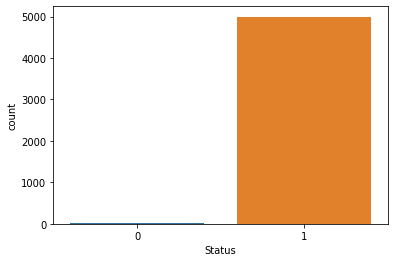

In [18]:
sns.countplot(y_test)
print(y_test.value_counts())

In [19]:
X_test_sm, y_test_sm = sm.fit_resample(X_train_final, y_test)

print(f'''Shape of X before SMOTE: {X_train_final.shape}
Shape of X after SMOTE: {X_test_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print("After OverSampling, counts of label '1': {}".format(sum(y_test_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_sm==0)))


Shape of X before SMOTE: (5026, 10)
Shape of X after SMOTE: (9994, 10)

Balance of positive and negative classes (%):
After OverSampling, counts of label '1': 4997
After OverSampling, counts of label '0': 4997


(5) Lakukan cross-validation dengan estimator AdaBoost dengan untuk menentukan nilai optimal untuk berbagai hyperparameter. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'learning_rate':[0.1,1,0.01],
             'n_estimators':[10,100,10]}

gscv = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)
gscv.fit(X_train_sm, y_train_sm)
best_param = gscv.best_params_

In [21]:
best_param

{'learning_rate': 1, 'n_estimators': 100}

In [22]:
ada = AdaBoostClassifier()
ada_opt = AdaBoostClassifier(**best_param)

ada.fit(X_train_sm, y_train_sm)
ada_opt.fit(X_train_sm, y_train_sm)

y_pred_test_def = ada.predict(X_test_sm)
y_pred_test_opt = ada_opt.predict(X_test_sm)

#X_test_sm, y_test_sm

In [23]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test_sm, y_pred_test_opt, labels=[1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4997
           0       1.00      1.00      1.00      4997

    accuracy                           1.00      9994
   macro avg       1.00      1.00      1.00      9994
weighted avg       1.00      1.00      1.00      9994



In [24]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test_sm, y_pred_test_def, labels=[1,0]))

Result of Testing Datast without optimized parameter
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4997
           0       1.00      1.00      1.00      4997

    accuracy                           1.00      9994
   macro avg       1.00      1.00      1.00      9994
weighted avg       1.00      1.00      1.00      9994



In [32]:
from sklearn.metrics import f1_score

print("F1 Score Data with optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_opt, average='weighted')))
print("F1 Score Data without optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_def, average='weighted')))

F1 Score Data with optimized parameter : 0.9996998198648865
F1 Score Data without optimized parameter : 0.999399639567481


Hasil perbandingan dari sebelum dan sesudah di optimizer, terlihat tidak terjadi perubahan antara keduanya. hal ini terjadi karena default parameter dari xgboost tidak terlalu berbeda dengan parameter yang dipilihkan oleh grid search. hanya berbeda pada parameter learning rate.

(6) Lakukan cross-validation dengan estimator XGBoost dengan untuk menentukan nilai optimal untuk berbagai hyperparameter. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from xgboost import XGBClassifier
param_grid = {'learning_rate':[0.1,1,0.01],
             'n_estimators':[10,100,10],
             'gamma' : [0.1,1,10],
             'eval_metric': ['mlogloss']}

xgb = GridSearchCV(XGBClassifier(), param_grid, cv=5)

xgb.fit(X_train_sm, y_train_sm)
best_param = gscv.best_params_

In [34]:
best_param

{'learning_rate': 1, 'n_estimators': 100}

In [35]:
xgb = XGBClassifier()
xgb_opt = XGBClassifier(**best_param)

xgb.fit(X_train_sm, y_train_sm)
xgb_opt.fit(X_train_sm, y_train_sm)

y_pred_test_def_xgb = ada.predict(X_test_sm)
y_pred_test_opt_xgb = ada_opt.predict(X_test_sm)

#X_test_sm, y_test_sm

[21:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test_sm, y_pred_test_opt_xgb, labels=[1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4997
           0       1.00      1.00      1.00      4997

    accuracy                           1.00      9994
   macro avg       1.00      1.00      1.00      9994
weighted avg       1.00      1.00      1.00      9994



In [37]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test_sm, y_pred_test_def_xgb, labels=[1,0]))

Result of Testing Datast without optimized parameter
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4997
           0       1.00      1.00      1.00      4997

    accuracy                           1.00      9994
   macro avg       1.00      1.00      1.00      9994
weighted avg       1.00      1.00      1.00      9994



In [38]:
print("F1 Score Data with optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_opt_xgb, average='weighted')))
print("F1 Score Data without optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_def_xgb, average='weighted')))

F1 Score Data with optimized parameter : 0.9996998198648865
F1 Score Data without optimized parameter : 0.999399639567481


Jika dilihat dari nilai akurasi, precison, dan recall tidak ada bedanya. keduanya sudah mendapatkan hasil yang optimal. jika dilihat menggunakan penilaian f1 score dengan library sklearn, hasil menggunakan optimized parameter berbeda 0.0003 dari lebih bagus dari pada dengan parameter default.

(7) Dari hasil performansi yang Anda dapatkan pada tugas ini dan tugas sebelumnya, manakah estimator yang cocok untuk dataset ini?

dari hasil Adaboost dan XGboost mendapatkan hasil yang baik. akurasi keduanya adalah 1 atau sempurna. sehingga dapat disimpulkan bahwa Adaboost dan XGboost merupakan estimator yang cocok untuk dataset ini